In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ibner\Downloads\Wage.csv")
df

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [4]:
X =df[['age']]
Y = df[['wage']]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)



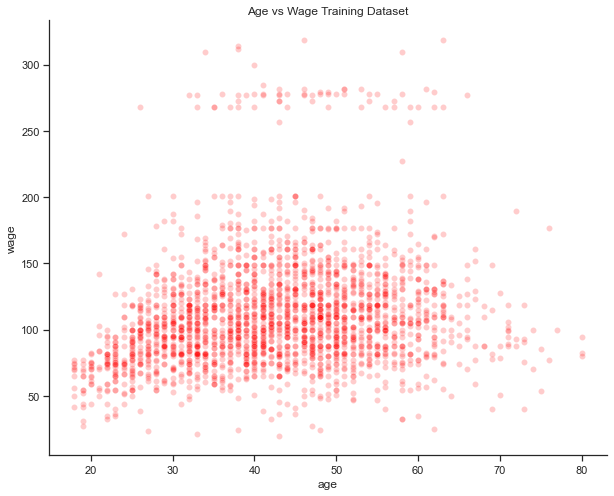

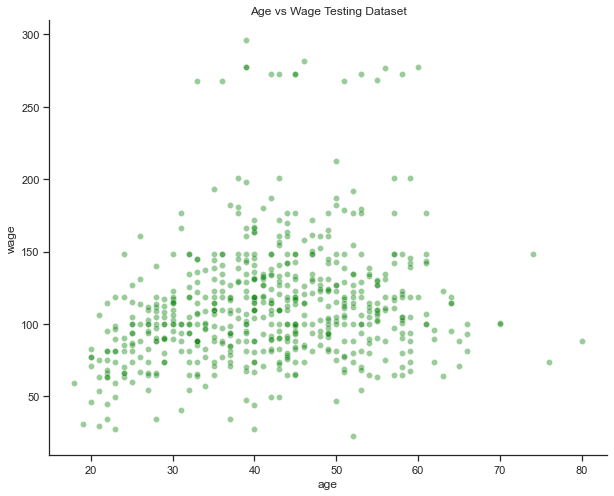

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
 
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train['age'], y=y_train['wage'], color="red",alpha=0.2)
plt.title("Age vs Wage Training Dataset")
 
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_test['age'], y=y_test['wage'], color="green",alpha=0.4)
plt.title("Age vs Wage Testing Dataset")
 
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
 
print("Slope of the Regression Line is : ", lm.coef_)
print("Intercept of Regression Line is : ",lm.intercept_)
 
from sklearn.metrics import mean_squared_error
pred_test = lm.predict(X_test)
rmse_test =mean_squared_error(y_test, pred_test, squared=False)
 
print("Accuracy of Linear Regression on testing data is : ",rmse_test)


Slope of the Regression Line is :  [[0.68904221]]
Intercept of Regression Line is :  [82.09009765]
Accuracy of Linear Regression on testing data is :  40.68927607250081


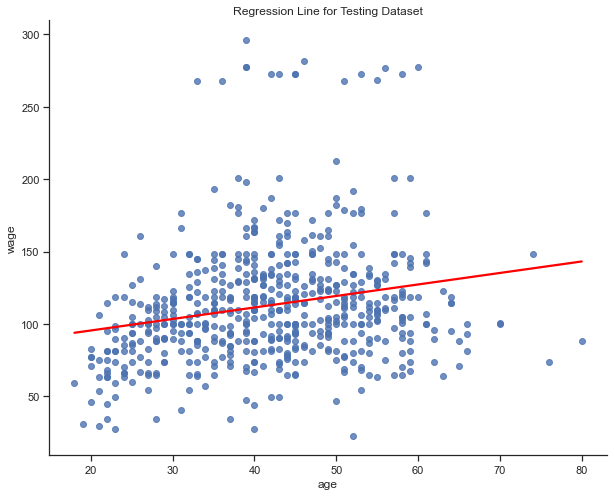

In [9]:
plt.figure(figsize=(10,8))
sns.regplot(x=X_test['age'], y=y_test['wage'], ci=None, line_kws={"color": "red"})
plt.title("Regression Line for Testing Dataset")
plt.show()

In [11]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
pm = LinearRegression()
pm.fit(X_train_poly,y_train)
 
pred_test = pm.predict(X_test_poly)
rmse_test =mean_squared_error(y_test,pred_test,squared=False)
 
print("Accuracy of Polynomial Regression on testing data is : ",rmse_test)


Accuracy of Polynomial Regression on testing data is :  39.508525665546316


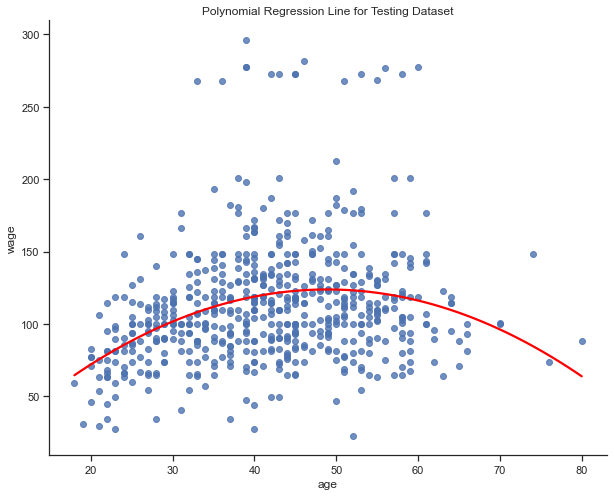

In [12]:
plt.figure(figsize=(10,8))
sns.regplot(x=X_test['age'], y=y_test['wage'], ci=None, line_kws={"color": "red"},order=2)
plt.title("Polynomial Regression Line for Testing Dataset")
plt.show()

In [13]:
from patsy import dmatrix

C:\Users\ibner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ibner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Accuracy for Cubic Spline on testing data is :  39.450613233348676


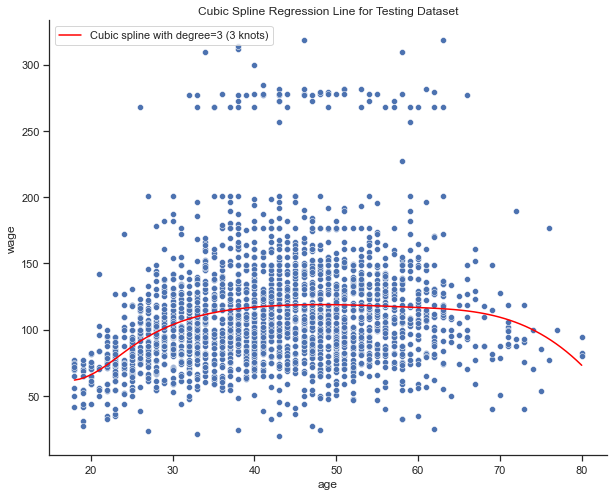

In [14]:
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"train": X_train},return_type='dataframe')
import statsmodels.api as sm
cs = sm.GLM(y_train, transformed_x).fit()
pred_test = cs.predict(dmatrix("bs(test, knots=(25,40,60), include_intercept=False)",
                               {"test": X_test}, return_type='dataframe'))
rmse_test =mean_squared_error(y_test, pred_test, squared=False)
print("Accuracy for Cubic Spline on testing data is : ",rmse_test)
 
import numpy as np
plt.figure(figsize=(10,8))
xp = np.linspace(X_test.min(),X_test.max(), 100)
pred = cs.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", 
                          {"xp": xp}, return_type='dataframe'))
sns.scatterplot(x=X_train['age'], y=y_train['wage'])
plt.plot(xp, pred, label='Cubic spline with degree=3 (3 knots)', color='red')
plt.legend()
plt.title("Cubic Spline Regression Line for Testing Dataset")
plt.show()